
ANTsPy is a Python wrapper for the ANTs neuroimage processing library, along with other pythonic tools that make it easy and fun to work with brain images directly in Python.


First, install ANTsPy. It can be installed from source (takes 30-60min) with the following code:<br>

git clone https://github.com/ANTsX/ANTsPy.git
cd ANTsPy
python setup.py install
```

It can also be installed very quickly from pre-made wheels (latest release only available for Mac, but a previous release is available for Linux which should be OK): https://github.com/ANTsX/ANTsPy/releases . Download the .whl file then run the following:<br>
```
for python 3.7 version at moment. Create env with python=3.7
pip install /path/to/file.whl
```

# Alternative installation working for Linux<br>
```
conda create -n antspy python=3.8
conda activate antspy
pip install antspyxP
```

In [1]:
import ants
import numpy as np
import glob

In [6]:
''' load ref brain'''
reg_img= ants.image_read('test_data/reference-brain.tif')

''' load brain images to register'''
path =r'test_data/'
all_files = glob.glob(path + "/*stack.tif")
print (all_files)

images = []
for filename in all_files:
    img = ants.image_read(filename)
    images.append(img)
images



['test_data/mri-2-stack.tif', 'test_data/mri-3-stack.tif', 'test_data/mri-1-stack.tif']


[ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (186, 226, 27)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (186, 226, 27)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.],
 ANTsImage (RAI)
 	 Pixel Type : float (float32)
 	 Components : 1
 	 Dimensions : (186, 226, 27)
 	 Spacing    : (1.0, 1.0, 1.0)
 	 Origin     : (0.0, 0.0, 0.0)
 	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]]

In [7]:
img1 = images[0]

In [8]:
print (reg_img)
print(img1)

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



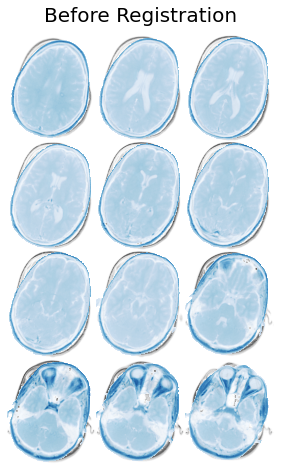

In [9]:
reg_img.plot(overlay=img1, title='Before Registration', axis=2, cmap = 'Greys',
overlay_cmap = 'Blues')

In [10]:
mytx = ants.registration(fixed=reg_img, moving=img1, type_of_transform='SyN')
print(mytx)

/Users/fernandesm/opt/anaconda3/envs/antspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'warpedmovout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'warpedfixout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'fwdtransforms': ['/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpk0nnsu2f1Warp.nii.gz', '/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpk0nnsu2f0GenericAffine.mat'], 'invtransforms': ['/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpk0nnsu2f0GenericAffine.mat', '/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpk0nnsu2f1InverseWarp.nii.gz']}


/Users/fernandesm/opt/anaconda3/envs/antspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


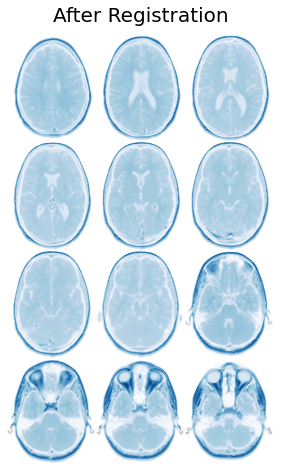

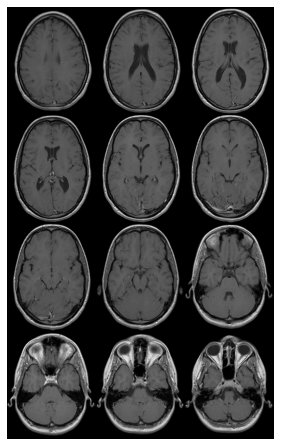

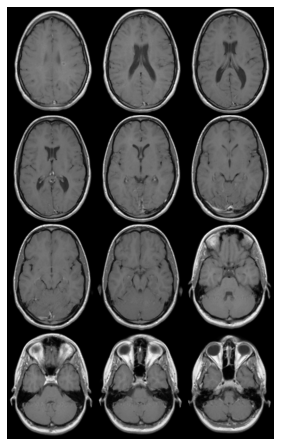

In [12]:
warped_moving = mytx['warpedmovout']
reg_img.plot(overlay=warped_moving,
           title='After Registration', axis=2, cmap = 'Greys',
overlay_cmap = 'Blues')

reg_img.plot(axis=2)
mytx['warpedmovout'].plot(axis=2)

In [13]:
'''perform registration for all files at once'''

images_to_register = images
results= []

for image in images_to_register:
     transf = ants.registration(fixed=reg_img, moving=image , type_of_transform='SyN')
     results.append(transf)

print (results)


/Users/fernandesm/opt/anaconda3/envs/antspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'warpedmovout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'warpedfixout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
, 'fwdtransforms': ['/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpttbjmgv01Warp.nii.gz', '/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpttbjmgv00GenericAffine.mat'], 'invtransforms': ['/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpttbjmgv00GenericAffine.mat', '/var/folders/g8/ppydmrzd0p5b2y5qr933ph39x2tvsp/T/tmpttbjmgv01InverseWarp.nii.gz']}, {'warpedmovout': ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0.

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



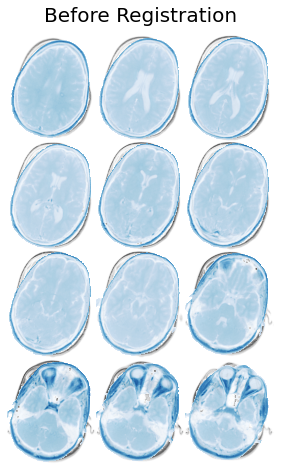

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



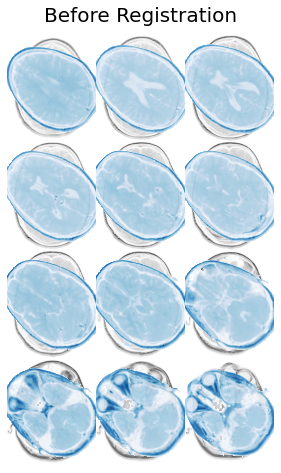

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



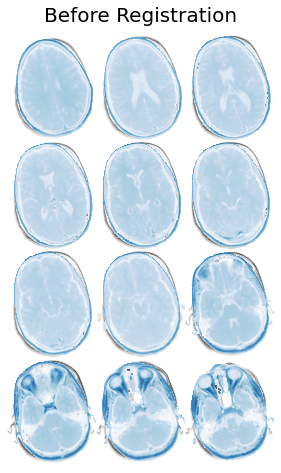

In [14]:
for idx, r in enumerate(images):
    print (images_to_register[idx])
    images_moving = r
    reg_img.plot(overlay=images_moving,
           title='Before Registration', axis=2, cmap = 'Greys',
    overlay_cmap = 'Blues')

/Users/fernandesm/opt/anaconda3/envs/antspy/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



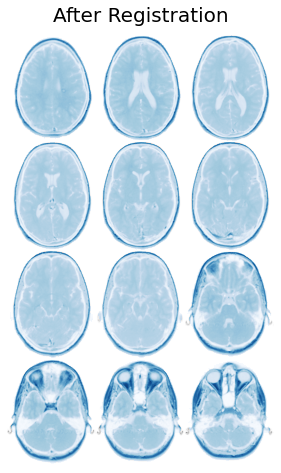

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



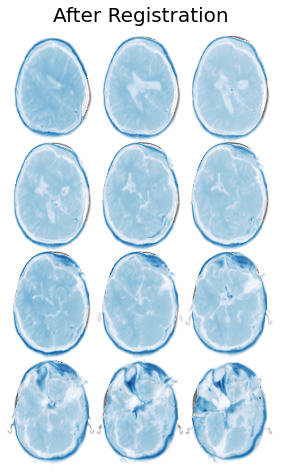

ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (186, 226, 27)
	 Spacing    : (1.0, 1.0, 1.0)
	 Origin     : (0.0, 0.0, 0.0)
	 Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]



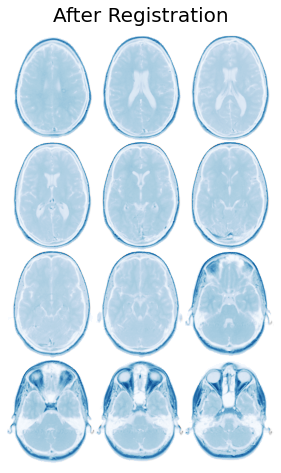

In [15]:
for idx, r in enumerate(results):
    print (images_to_register[idx])
    results_moving = r['warpedmovout']
    reg_img.plot(overlay=results_moving ,
           title='After Registration', axis=2, cmap = 'Greys',
    overlay_cmap = 'Blues')

# Conclusions
# - For one of the brains this registration is not great. 
# - Need to optimize. Maybe first just rotate first and then additional transformations
# - It it important to be consistent during data collection